# Warm-up
## Task 1
The first part of the project consists of two small tasks. You can find a .csv file for each one in the warm-up.zip archive from the resource section. Write the solution for all the tasks in a warm-up-solution.ipynb notebook that should run with the exts-ml course environment.

The first task consists of fitting the following equation to a set of 50 x/y data points.

y
=
a
∗
log
(
x
)
+
b

Your curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps

- Fit the curve, 
- plot it
- Compute the RSS and R2 measures
- Discuss the results, is it a good 
R
2
 score?

In [181]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

In [182]:
data_df = pd.read_csv(os.path.join('warm-up', 'task-1.csv'))

In [183]:
data_df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [184]:
data_df.shape

(50, 2)

In [185]:
x = data_df.x.values
y = data_df.y.values

Text(0, 0.5, 'y')

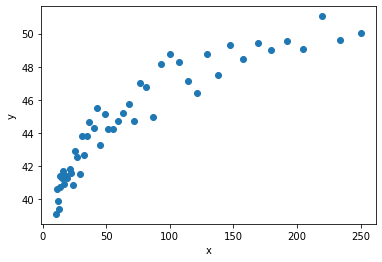

In [198]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

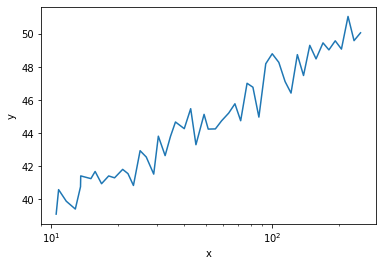

In [201]:
plt.semilogx(x,y)
# plt.scatter(x, np.log(y))
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

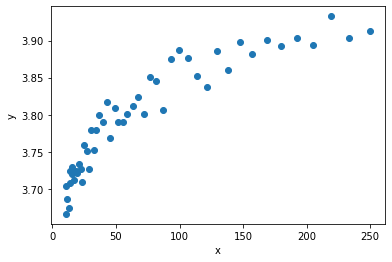

In [200]:
plt.scatter(x, np.log(y))
plt.xlabel('x')
plt.ylabel('y')

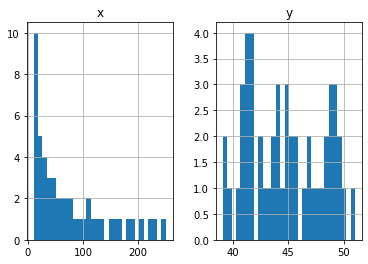

In [199]:
data_df.hist(bins = 30)
plt.show()

As we can see the histogram is skewed to the right and it is an indication that a log transformation could be useful in this case.

I will use the log transformation (feature engineering) for the input variable x. Then I will use a polynomial of degree = 1 (linear) in order to fit the transformed x. I check that there is no x == 0.

In [66]:
coefs, res, rank, singular_values, rcond = np.polyfit(np.log(x), y, deg = 1, full = True)
y_pred = np.polyval(coefs, np.log(x))

In [67]:
x_values = np.linspace(x.min(), x.max(), num = 100)
y_values = np.polyval(coefs, np.log(x_values))

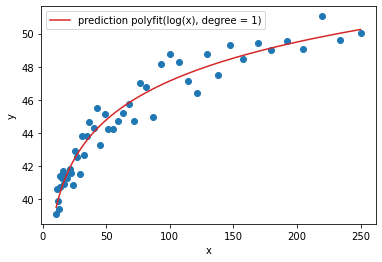

In [68]:
plt.scatter(x,y)
plt.plot(x_values, y_values, c = 'C3', label = 'prediction polyfit(log(x), degree = 1)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


the function polyfit is using the RSS as a cost function.

In [69]:
coefs

array([ 3.390241  , 31.52920122])

In [70]:
r2 = r2_score(y, y_pred)
r2

0.9411567093138288

or else:

In [71]:
res

array([31.84265175])

In [72]:
rank

2

In [73]:
rcond

1.1102230246251565e-14

__Interpretation:__
Variance is the quantification of noise in the data, i.e. the random fluctuation around the mean. The interpretation of the R2 score is that the model can predict the 94% of the variance present in the data, which is a very good result.

R2 = 1- RSSmodel/RSSbaseline

In this case R2 ≈ 1 which means that the our model perfroms better than the beseline.

In [74]:
def RSS(y, ypred):
    return np.sum(np.square(y-ypred))

In [75]:
RSS(y,y_pred)

31.842651752756687

In [193]:
RSS(y, np.mean(y))

541.1432872199999

Is obvious that the RSS obtained with fitting the model compared with the baeline is a very good one.

# Task 2
The second task consists of fitting a model to a set of data points that contains outliers. 

The goal is to try and compare different approaches to handle outliers. Use the train/test split methodology (ex. 80-20 splits) and compare the test MAE score for each one of the following approaches

 - Fit a linear regression with the outliers
 - Fit a huber regression with the outliers
 - Fit a linear regression without the outliers
 
The linear regression without outliers and huber regression models should both perform better than the linear regression with outliers.

In [204]:
data2_df = pd.read_csv(os.path.join('warm-up', 'task-2.csv'))

In [205]:
data2_df.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [206]:
data2_df.shape

(1000, 4)

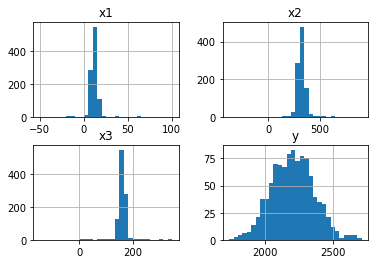

In [207]:
data2_df.hist(bins = 30);

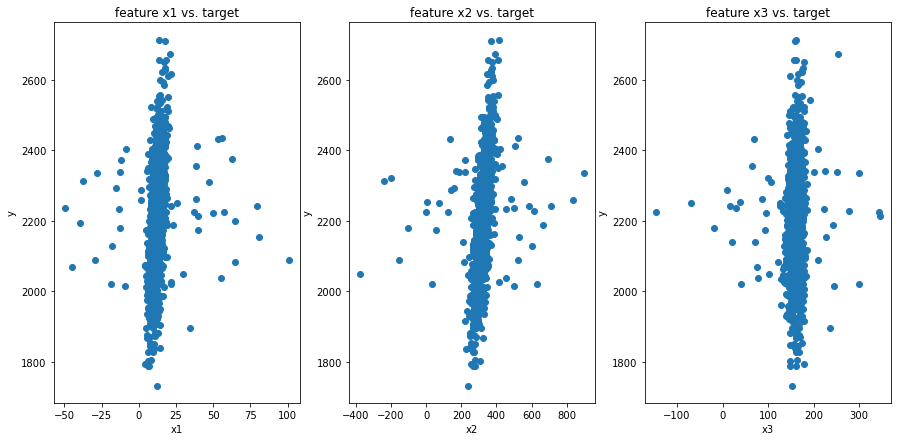

In [230]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
# fig.subplots_adjust(hspace=.3, wspace=.175)
for feature, ax in zip(['x1', 'x2', 'x3'], axes.ravel()):
    ax.scatter(data2_df[feature], data2_df.y)
    ax.set(title = 'feature {} vs. target'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')

    #axes[feature, ax].scatter(data2_df[feature], data2_df.y)
    #data2_df[feature].plot(data2_df.y)
    
    
    
    
    

I observe that the distributions are symetrical with respect to the outliers (not skewed). That means that it makes sense to use the z-score method to identify the outliers, although the distributions are not gaussian or nearly gaussian.

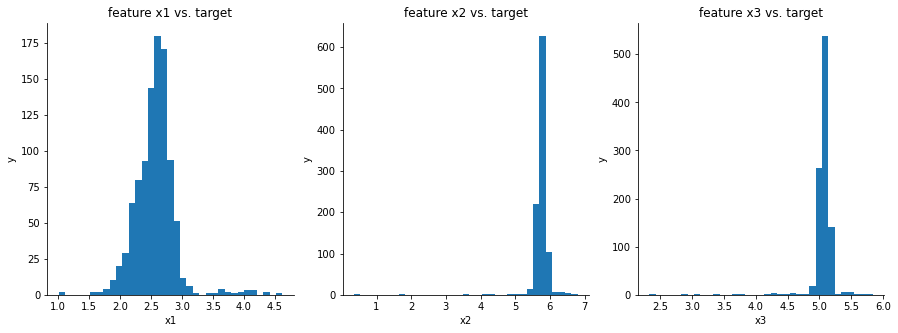

In [247]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
for feature, ax in zip(['x1', 'x2', 'x3'], axes.ravel()):
    ax.hist(np.log1p(data2_df[feature]), bins = 35)
    sns.despine()
    ax.set(title = 'feature {} vs. target'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')

the log-transformation does not help in this case since none of the distributions result to a normal distribution after the transformation.

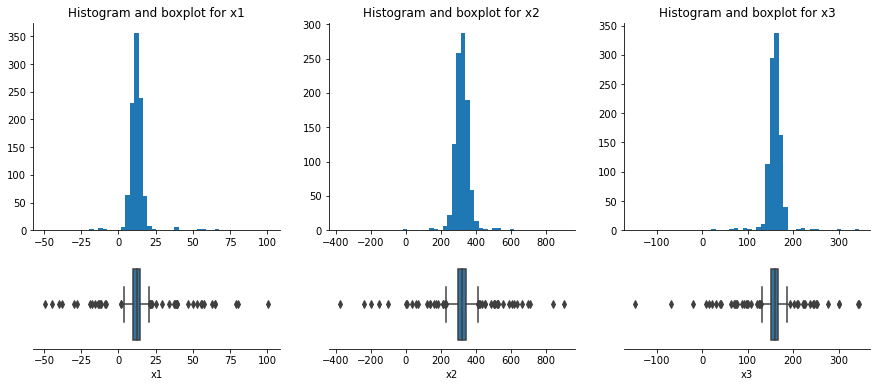

In [240]:
fig, axes = plt.subplots(2, 3, gridspec_kw = {"height_ratios": (0.7, 0.3)}, figsize = (15,6))

# pairing feature with column in plot
for (feature, plot_col) in zip(['x1', 'x2', 'x3'], [0, 1, 2]):
    axes[0, plot_col].hist(data2_df[feature], bins = 50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax = axes[0, plot_col])
    sns.boxplot(data2_df[feature], ax = axes[1, plot_col], fliersize = 5)
    axes[1, plot_col].set(yticks = [])
    sns.despine(ax = axes[1, plot_col], left = True)
    
    

### Split train and test data:
split the data set 80-20%

more confident with panda

In [88]:
train_df, test_df = train_test_split(data2_df, train_size = 0.8, test_size = 0.2, random_state = 0)

In [89]:
X_tr = train_df.drop(['y'], axis = 1).values
y_tr = train_df['y'].values
X_te = test_df.drop(['y'], axis = 1).values
y_te = test_df['y'].values

In [90]:
def MAE(y, y_pred):
    return np.mean(np.abs(y-y_pred))

### Baseline

In [91]:
print(MAE(y_te, np.mean(y_tr)))

117.26195640000003


### fit Linear Regression

In [92]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('R2 score:', lr.score(X_te, y_te))

y_pred_lr = lr.predict(X_te)

print(MAE(y_te, lr.predict(X_te)))

Coefficients: [ 3.18946219  0.72611244 -0.29586984]
Intercept: 1982.1964160299176
R2 score: 0.17957703204094855
104.78843301492125


### fit Huber Regressor

In [93]:
huber = HuberRegressor()
huber.fit(X_tr, y_tr)

print('Coefficients:', huber.coef_)
print('Intercept:', huber.intercept_)
print('R2 score:', huber.score(X_te, y_te))

y_pred_huber = huber.predict(X_te)
print(MAE(y_te, huber.predict(X_te)))

Coefficients: [11.70103578  2.21157025 -0.35049229]
Intercept: 1413.3619810993166
R2 score: 0.01898605837627443
83.90812366882037


### removing outliers

I have observed that none of the features exhibit a normal distribution also after a log transformation. Therefore I will choose some a more statistically robust method to cutoff outliers in this case the median abslute deviation MAD with a constant of C = 2√3 ≈ 1.1547

### Method - 1: Median Absolute Deviation (MAD)

In [94]:
C = 2/np.sqrt(3)
C

1.1547005383792517

In [95]:
X_tr[1]

array([ 19.161, 339.872, 156.181])

In [39]:
def MAD(X, C):
    return C*np.median(np.abs(X - np.median(X, axis = 0)), axis = 0)

In [40]:
m = np.median(X, axis = 0)
m

NameError: name 'X' is not defined

In [41]:
X<m

NameError: name 'X' is not defined

In [42]:
def doubleMAD(X, C):
    C = 2/np.sqrt(3)
    m = np.median(X, axis = 0)
    dev = np.abs(X-np.median(X, axis = 0))
    X_left = X[X<m]
    X_right = X[X>m]
    left_mad = C*np.median(np.abs(X_left - np.median(X_left, axis = 0)), axis = 0)
    right_mad = C*np.median(np.abs(X_right - np.median(X_right, axis = 0)), axis = 0)
    

In [43]:
X_left = X[X<m]
left_mad = C*np.median(np.abs(X_left - np.median(X_left, axis = 0)), axis = 0)
left_mad

NameError: name 'X' is not defined

In [44]:
# filter_mad = (X-np.median(X, axis = 0))/MAD(X,C) >

In [ ]:
MAD(X_tr, C)

In [ ]:
X = X_tr

## Question:
    I would like to discuss the double MAD implementation with you.

not sure how to finish

### Method - 1: Inter-quantile Range (IQR)

Since the distributions are not gaussian I will not apply the z-scores but the Interquantile range to filter the outliers.

In [96]:
# for one feature:
## compute the interquartile range
#Q1 = np.percentile(y, 25, axis=0)
#Q3 = np.percentile(y, 75, axis=0)
#IQR = Q3 - Q1 # interquatile range

# select outliers
#lower_bound = Q1 - 1.5 * IQR 
#upper_bound = Q3 + 1.5 * IQR
#idx = (y < lower_bound) | (y > upper_bound)

#coefs_iqr = np.polyfit(x[~idx], y[~idx], deg=1)

In [270]:
# compute the interquantile range IQR:
train_df_X = train_df.drop('y', axis = 1)
Q3 = np.quantile(train_df_X, 0.75, axis = 0)
# or equivalently: Q3_ = np.percentile(X, 75, axis = 0)
Q1 = np.quantile(train_df_X, 0.25, axis = 0)

IQR = Q3 - Q1
lower_bound = Q1 - 1.7*IQR
upper_bound = Q3 + 1.7*IQR

print("Feature 1: lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound[0], upper_bound[0]))
print("Feature 2: lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound[1], upper_bound[1]))
print("Feature 3: lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound[2], upper_bound[2]))

Feature 1: lower bound: 2.2347, upper bound: 21.8918
Feature 2: lower bound: 218.5799, upper bound: 420.2484
Feature 3: lower bound: 127.2128, upper bound: 191.0095


In [271]:
train_df_X.columns

Index(['x1', 'x2', 'x3'], dtype='object')

In [272]:
train_df_X.head()

,x1,x2,x3
687,10.298,276.916,127.701
500,19.161,339.872,156.181
332,11.356,363.086,158.807
979,10.656,326.522,164.297
817,11.599,222.001,179.855


In [273]:
train_df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,800.0,12.414394,8.795636,-49.652,9.82950,12.2200,14.29700,100.692
x2,800.0,318.736139,71.723179,-375.335,296.49725,321.4560,342.33100,836.358
x3,800.0,158.183629,26.196022,-146.921,151.86150,159.3275,166.36075,344.797


In [250]:
Q3

array([ 14.297  , 342.331  , 166.36075])

In [278]:
#select outliers:
idx = ((train_df_X < lower_bound) | (train_df_X > upper_bound))
print("total number of outliers per feature: ")
print(idx.sum(axis = 0))

idx.sum(axis = 0)


total number of outliers per feature: 
x1    36
x2    36
x3    35
dtype: int64


x1    36
x2    36
x3    35
dtype: int64

In [279]:
idx

,x1,x2,x3
687,False,False,False
500,False,False,False
332,False,False,False
979,False,False,False
817,False,False,False
...,...,...,...
835,False,True,True
192,False,False,False
629,False,False,False
559,False,False,False


In [280]:
idx.sum(axis=0).sum()

107

In [281]:
idx_any = idx.any(axis = 1)

In [282]:
idx.any(axis = 0)

x1    True
x2    True
x3    True
dtype: bool

In [283]:
idx.any(axis = 1)

687    False
500    False
332    False
979    False
817    False
       ...  
835     True
192    False
629    False
559    False
684    False
Length: 800, dtype: bool

In [284]:
idx_any.sum()

46

In [285]:
outliers = train_df_X.loc[idx_any, :]
outliers.shape

(46, 3)

In [286]:
outliers.head()

,x1,x2,x3
37,-29.581,522.695,139.120
294,49.970,265.393,96.210
342,62.745,693.286,148.828
162,-8.945,502.071,245.019
875,-8.608,420.773,208.850


In [287]:
train_df_wo = train_df.drop(outliers.index, axis = 0)
train_df_wo.head()

,x1,x2,x3,y
687,10.298,276.916,127.701,1962.885
500,19.161,339.872,156.181,2442.675
332,11.356,363.086,158.807,2417.074
979,10.656,326.522,164.297,2220.691
817,11.599,222.001,179.855,1916.097


In [288]:
train_df_wo.shape

(754, 4)

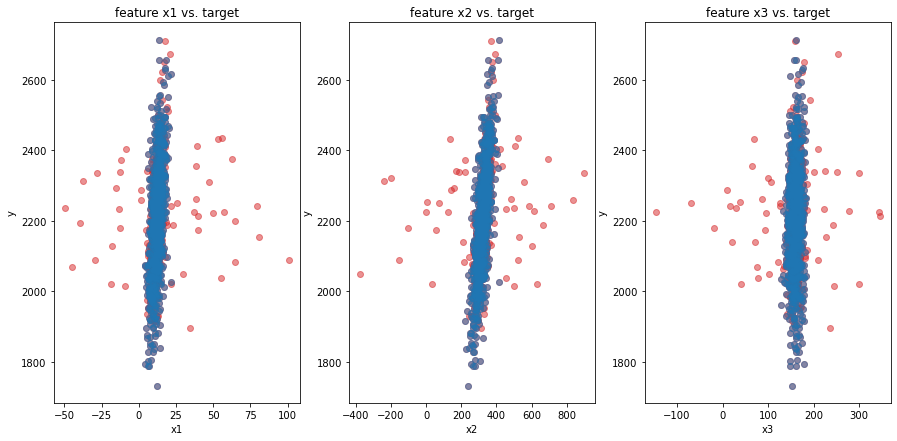

In [290]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
# fig.subplots_adjust(hspace=.3, wspace=.175)
for feature, ax in zip(['x1', 'x2', 'x3'], axes.ravel()):
    ax.scatter(data2_df[feature], data2_df.y, c= 'C3', alpha = 0.5)
    ax.scatter(train_df_wo[feature], train_df_wo.y, alpha = 0.5)
    ax.set(title = 'feature {} vs. target'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')

In the first look it looks strange that some points are marked as outliers although they overlap with the main distibution. This happens because these points that seem to not to be outliers with respect to feature x1 are outliers with respect to x2 or x3.

In [318]:
train_df.shape

(800, 4)

In [291]:
train_df_wo.head()

,x1,x2,x3,y
687,10.298,276.916,127.701,1962.885
500,19.161,339.872,156.181,2442.675
332,11.356,363.086,158.807,2417.074
979,10.656,326.522,164.297,2220.691
817,11.599,222.001,179.855,1916.097


In [292]:
X_tr_wo = train_df_wo.drop(['y'], axis = 1).values
y_tr_wo = train_df_wo['y'].values

In [293]:
lr_wo = LinearRegression()
lr_wo.fit(X_tr_wo, y_tr_wo)

print('Coefficients:', lr_wo.coef_)
print('Intercept:', lr_wo.intercept_)
print('R2 score:', lr_wo.score(X_te, y_te))

y_pred_wo = lr_wo.predict(X_te)
print(MAE(y_te, lr_wo.predict(X_te)))

Coefficients: [28.47348064  3.77208548  2.75902955]
Intercept: 216.2371473379112
R2 score: -1.0727533662411335
69.2791607757023


### Method - 2: using z-scores 
#### (due to symmetry, abscense of skewness although not gaussian)

using the z-scores we use the mean (μ) and the standard deviation (σ) to measure how many standard deviations away from the mean a data point is.

$z=\frac{x-\mu}{\sigma}$

I will choose the 3 standard deviations from the mean to flag the potential outliers, that means $|
z
|
>
3$
 for each feature.

In [307]:
# zscores_df = np.abs(train_df-train_df.mean()) > 3*train_df.std()
zscores_df = np.abs(train_df_X-train_df_X.mean())/train_df_X.std()

In [308]:
zscores_df.head()

,x1,x2,x3
687,0.240619,0.583077,1.163636
500,0.767040,0.294687,0.076448
332,0.120332,0.618348,0.023796
979,0.199917,0.108554,0.233370
817,0.092704,1.348729,0.827277


In [309]:
zfilter_df = np.abs(zscores_df) > 3
# or equivalently:
# zfilter_df = np.abs(train_df-train_df.mean()) > 3*train_df.std()
zfilter_df.head()

,x1,x2,x3
687,False,False,False
500,False,False,False
332,False,False,False
979,False,False,False
817,False,False,False


I will filter outliers using all features. If a point is an outlier w.r.t at least one feature then it is flaged an outlier. 

In [319]:
zfilter_any = zfilter_df.any(axis = 1)

In [327]:
zfilter_df.any(axis = 1).head()

687    False
500    False
332    False
979    False
817    False
dtype: bool

In [320]:
zfilter_df.any(axis = 0)

x1    True
x2    True
x3    True
dtype: bool

In [322]:
z_outliers = train_df.loc[z_filter_any, :]
z_outliers.shape

(38, 4)

In [323]:
train_df_wo_z = train_df.drop(zoutliers.index, axis = 0)

In [324]:
train_df_wo_z.shape

(762, 4)

In [ ]:
X_tr_wo_z = train_df_wo_z.drop(['y'], axis = 1).values
y_tr_wo_z = train_df_wo_z['y'].values

In [328]:
lr_wo_z = LinearRegression()
lr_wo_z.fit(X_tr_wo, y_tr_wo)

print('Coefficients:', lr_wo_z.coef_)
print('Intercept:', lr_wo_z.intercept_)
print('R2 score:', lr_wo_z.score(X_te, y_te))

y_pred_wo = lr_wo_z.predict(X_te)
print(MAE(y_te, lr_wo_z.predict(X_te)))

Coefficients: [28.47348064  3.77208548  2.75902955]
Intercept: 216.2371473379112
R2 score: -1.0727533662411335
69.2791607757023


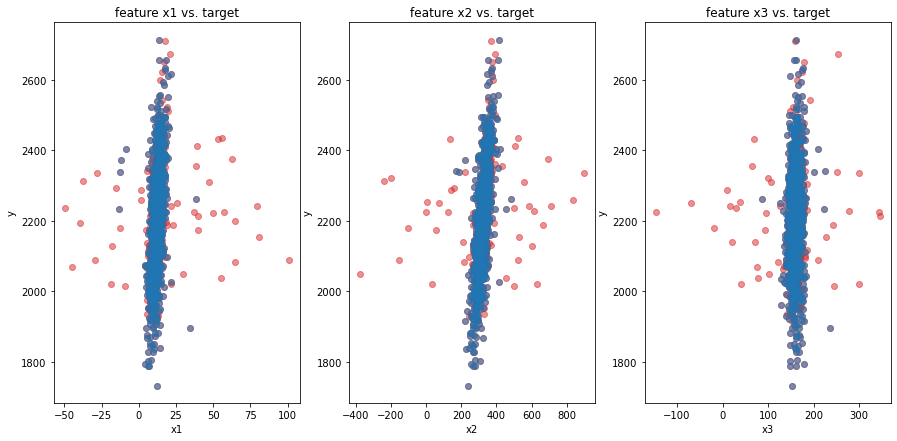

In [341]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
# fig.subplots_adjust(hspace=.3, wspace=.175)
for feature, ax in zip(['x1', 'x2', 'x3'], axes.ravel()):
    ax.scatter(data2_df[feature], data2_df.y, c= 'C3', alpha = 0.5)
    ax.scatter(train_df_wo_z[feature], train_df_wo_z.y, alpha = 0.5)
    ax.set(title = 'feature {} vs. target'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')

### Method - 3: Median Absolute Deviation (MAD)

I will now try to filter outliers with more robust statistics, like the median, that are less affected by outliers. I will therefore use robust z-scores with MAD which mimick the idea of z-scores but the mean is replaced by the median and the standard deviation by the median absolute deviation (MAD).
$z_{robust} = \frac{x-\textrm{median}}{\textrm{MAD}} 
\qquad \textrm{where} \qquad 
\textrm{MAD} = C \,\cdot\, \textrm{median}\vert(x-\textrm{median})\vert$


In [94]:
C = 2/np.sqrt(3)
C

1.1547005383792517

In [95]:
X_tr[1]

array([ 19.161, 339.872, 156.181])

In [342]:
def MAD(df):
    C = 2/np.sqrt(3)
    return C*np.median(np.abs(df - np.median(df, axis = 0)), axis = 0)

In [343]:
train_df_X.median(axis = 0)

x1     12.2200
x2    321.4560
x3    159.3275
dtype: float64

In [345]:
z_rob_score_df = train_df_X-np.median(train_df_X, axis = 0)/MAD(train_df_X)
z_rob_score_df.head()

,x1,x2,x3
687,5.455707,264.763253,109.057349
500,14.318707,327.719253,137.537349
332,6.513707,350.933253,140.163349
979,5.813707,314.369253,145.653349
817,6.756707,209.848253,161.211349


In [346]:
z_rob_score_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,800.0,7.572101,8.795636,-54.494293,4.987207,7.377707,9.454707,95.849707
x2,800.0,306.583391,71.723179,-387.487747,284.344503,309.303253,330.178253,824.205253
x3,800.0,139.539978,26.196022,-165.564651,133.217849,140.683849,147.717099,326.153349


When we use MAD (z_robust scores) what are the upper and lower bounds that we use? Is there a rule of thumb?

In [384]:
zrob_filter = np.abs(z_rob_score_df) > np.percentile(z_rob_score_df, 96, axis = 0)
#np.percentile(y, 75, axis=0)

In [385]:
np.percentile(z_rob_score_df,80, axis = 0)

array([  9.91370742, 333.91245255, 149.8093488 ])

In [386]:
zrob_filter.head()

,x1,x2,x3
687,False,False,False
500,True,False,False
332,False,False,False
979,False,False,False
817,False,False,True


In [ ]:
zrob_filter_any = zrob_filter.any(axis = 1)
zrob_filter_any

In [388]:
train_df.shape

(800, 4)

In [389]:
zrob_outliers = train_df.loc[zrob_filter_any, :]
zrob_outliers.shape

(78, 4)

In [392]:
train_df_wo_zrob = train_df.drop(zrob_outliers.index, axis = 0)

In [393]:
train_df_wo_zrob.shape

(722, 4)

In [394]:
X_tr_wo_zrob = train_df_wo_zrob.drop(['y'], axis = 1).values
y_tr_wo_zrob = train_df_wo_zrob['y'].values

Coefficients: [28.47348064  3.77208548  2.75902955]
Intercept: 216.2371473379112
R2 score: -1.0727533662411335
69.2791607757023


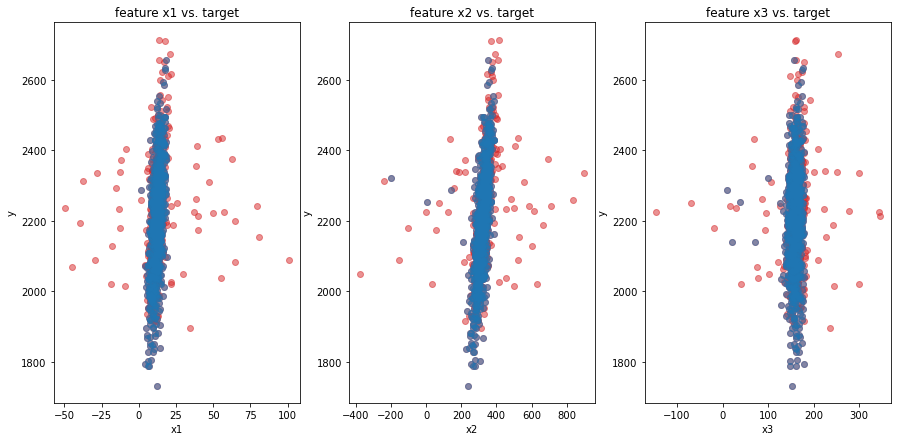

In [395]:
lr_wo_zrob = LinearRegression()
lr_wo_zrob.fit(X_tr_wo, y_tr_wo)

print('Coefficients:', lr_wo_z.coef_)
print('Intercept:', lr_wo_z.intercept_)
print('R2 score:', lr_wo_z.score(X_te, y_te))

y_pred_wo_zrob = lr_wo_zrob.predict(X_te)
print(MAE(y_te, lr_wo_zrob.predict(X_te)))

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
# fig.subplots_adjust(hspace=.3, wspace=.175)
for feature, ax in zip(['x1', 'x2', 'x3'], axes.ravel()):
    ax.scatter(data2_df[feature], data2_df.y, c= 'C3', alpha = 0.5)
    ax.scatter(train_df_wo_zrob[feature], train_df_wo_zrob.y, alpha = 0.5)
    ax.set(title = 'feature {} vs. target'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')

I am confused with the doubleMAD implementation (for the case of asymmetry).

## Questions for a 1-1 Session:
I would like to discuss the double MAD implementation with you in a 1-1 Session.
1. When we use MAD (z_robust scores) what are the upper and lower bounds that we use? Is there a rule of thumb? I used the np.percentile(z_rob_score_df, 96, axis = 0) because I wanted to have the same number of outliers as with the previous methods.
2. I would expect MAD to give me better results than the z-scores.
3. I would like to finish the implementation of the doubleMAD in case of asymetry

### Compare the errors (MAE)

In [400]:
mae_baseline = MAE(y_te, np.mean(y_tr))
mae_lr = MAE(y_te, lr.predict(X_te))
mae_huber = MAE(y_te, huber.predict(X_te))
mae_wo_outliers = MAE(y_te, lr_wo.predict(X_te))
mae_wo_outliers_z = MAE(y_te, lr_wo_z.predict(X_te))
mae_wo_outliers_zrob = MAE(y_te, lr_wo_zrob.predict(X_te))

mae_values = [mae_baseline, mae_lr, mae_huber, mae_wo_outliers, mae_wo_outliers_z, mae_wo_outliers_zrob]

In [401]:
titles = ['baseline', 'lr', 'huber', 'lr_no_outliers-IRQ', 'lr_no_outliers-z-score', 'lr_no_outliers-MAD']

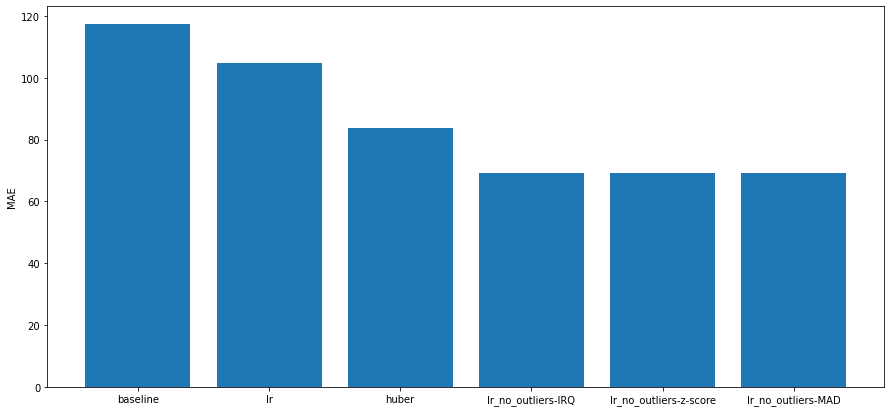

In [407]:
xcor = np.arange(len(mae_values))

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 7))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.ylabel('MAE')
plt.show()


As expected the linear regression after removing outliers has the best results (smaller error)